In [ ]:
from sklearn.datasets import load_wine

# Загрузка данных
data = load_wine()
X, y = data.data, data.target
print(data.DESCR)
print(y)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Обучение модели KNN с произвольным K
k_initial = 5
knn = KNeighborsClassifier(n_neighbors=k_initial)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

# Оценка качества модели
print("Качество первоначальной модели:")
print(accuracy_score(y_test,y_pred_test), accuracy_score(y_train,y_pred_train))

Качество первоначальной модели:
0.9259259259259259 0.9596774193548387


{'n_neighbors': np.int64(19)} 0.9629629629629629 0.9596774193548387


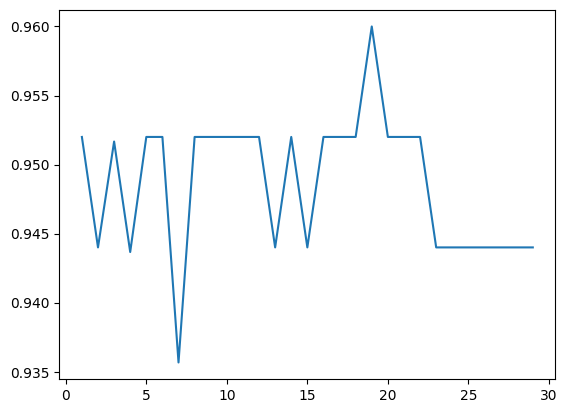

In [129]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold 
import matplotlib.pyplot as plt

# Подбор K с помощью GridSearchCV
n_range = np.arange(1, 30)
grid_params = {'n_neighbors': n_range}
grid_search = GridSearchCV(KNeighborsClassifier(), grid_params, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search.fit(X_train, y_train)

# Лучшая модель GridSearch
best_knn_grid = grid_search.best_estimator_
best_knn_param = grid_search.best_params_
y_pred_test = best_knn_grid.predict(X_test)
y_pred_train = best_knn_grid.predict(X_train)

print(best_knn_param, accuracy_score(y_pred_test,y_test),accuracy_score(y_pred_train,y_train))
plt.plot(n_range, grid_search.cv_results_['mean_test_score'])

{'n_neighbors': np.int64(25)} 0.9259259259259259 0.967741935483871


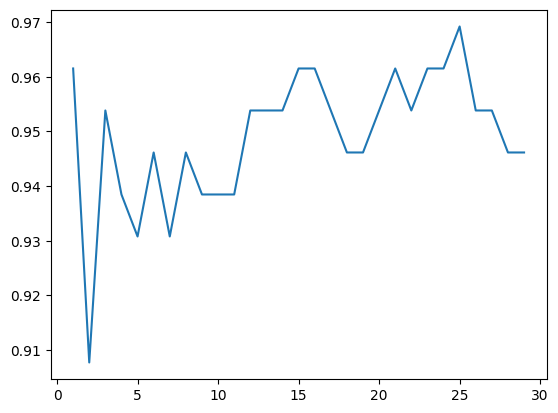

In [139]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedShuffleSplit

# Подбор K с помощью RandomizedSearchCV
random_search = RandomizedSearchCV(KNeighborsClassifier(), grid_params, cv=StratifiedShuffleSplit(n_splits=10), scoring='accuracy',n_iter=len(n_range))
random_search.fit(X_train, y_train)

# Лучшая модель RandomisedSearch
best_knn_random = random_search.best_estimator_
best_knn_param = random_search.best_params_
y_pred_test = best_knn_random.predict(X_test)
y_pred_train = best_knn_random.predict(X_train)

print(best_knn_param, accuracy_score(y_pred_test,y_test),accuracy_score(y_pred_train,y_train))
plt.plot(n_range, random_search.cv_results_['mean_test_score'])